In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Read Data

In [2]:
df = pd.read_csv("./datasets/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

2. Exploratory Data Analysis

2.1. Seperate numerical & categorical Features !

In [5]:
numerical_features = ["LotFrontage", "LotArea", "MasVnrArea",
                      "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF",
                      "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
                      "FullBath","HalfBath", "BedroomAbvGr","KitchenAbvGr", "TotRmsAbvGrd",
                      "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF",
                      "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
df_numerical = df[numerical_features]

In [27]:
date_features = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold" ]

In [7]:
categorical_features = [col for col in df.columns.tolist() if col not in numerical_features and col not in date_features]
categorical_features.remove('Id')
categorical_features.remove('SalePrice')
df_categorical = df[categorical_features]

2.2 Numerical Features

In [8]:
na_counts = df_numerical.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [9]:
df_numerical.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [10]:
# Fill NaN values with median

df_numerical.loc[df_numerical['LotFrontage'].isna(), "LotFrontage"] = df_numerical["LotFrontage"].median()
df_numerical.loc[df_numerical['MasVnrArea'].isna(), "MasVnrArea"] = df_numerical["MasVnrArea"].median()

<Axes: >

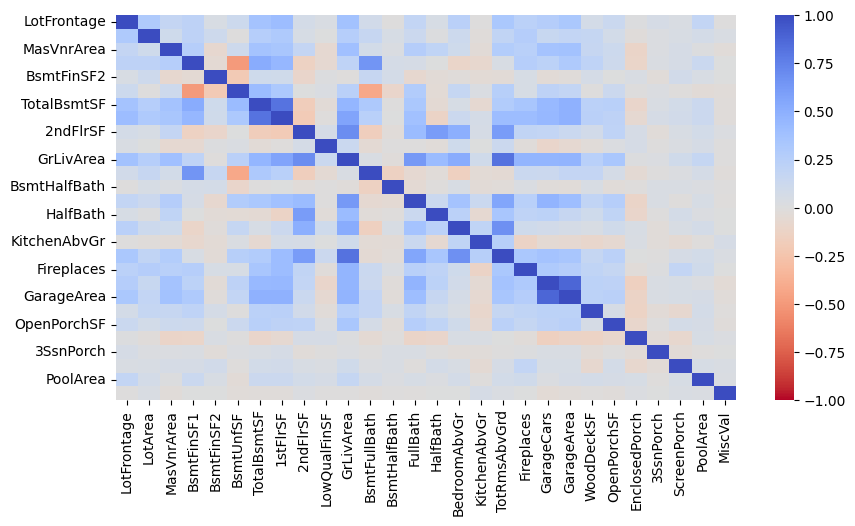

In [11]:
# Correlation btw numerical features
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_numerical.corr(), cmap='coolwarm_r', vmin = -1, vmax = 1, center = 0)

In [64]:
# Feature selection
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest

fselection = SelectKBest(score_func = r_regression, k="all")
fselection.fit_transform(df_numerical, df["SalePrice"])

fselection_df = pd.DataFrame(fselection.scores_, index = df_numerical.columns, columns= ['Score'])
fselection_df


,Score
LotFrontage,0.334771
LotArea,0.263843
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479
TotalBsmtSF,0.613581
1stFlrSF,0.605852
2ndFlrSF,0.319334
LowQualFinSF,-0.025606


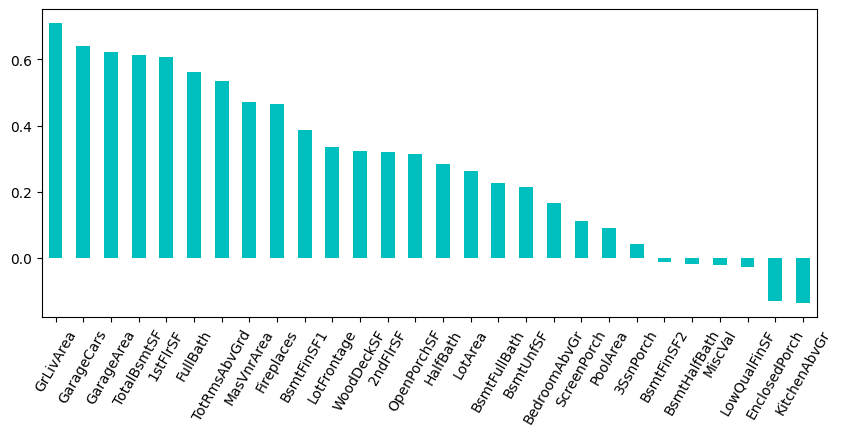

In [13]:
fselection_df['Score'].sort_values(ascending=False).plot.bar(figsize=(10,4), color = 'c')
plt.xticks(rotation=60)
plt.show()


We plot scatter plots between numerical features that have the highest correlation with our target values !

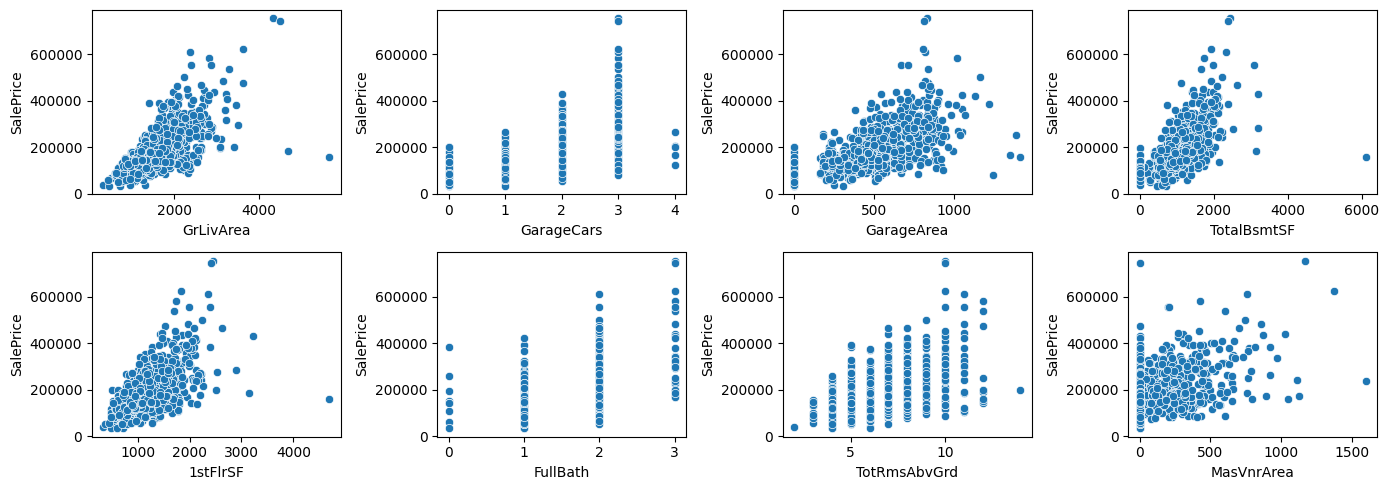

In [14]:
import warnings
warnings.filterwarnings("ignore", message=".*is_categorical_dtype is deprecated.*", category=FutureWarning)

fig, axs = plt.subplots(2, 4, figsize=(14, 5))

sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", ax=axs[0, 0])
sns.scatterplot(data=df, x="GarageCars", y="SalePrice", ax=axs[0, 1])
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", ax=axs[0, 2])
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", ax=axs[0, 3])
sns.scatterplot(data=df, x="1stFlrSF", y="SalePrice", ax=axs[1, 0])
sns.scatterplot(data=df, x="FullBath", y="SalePrice",  ax=axs[1, 1])
sns.scatterplot(data=df, x="TotRmsAbvGrd", y="SalePrice", ax=axs[1, 2])
sns.scatterplot(data=df, x="MasVnrArea", y="SalePrice",  ax=axs[1, 3])

plt.tight_layout()
plt.show()

We plot histograms for numerical features that have the highest correlation with our target values

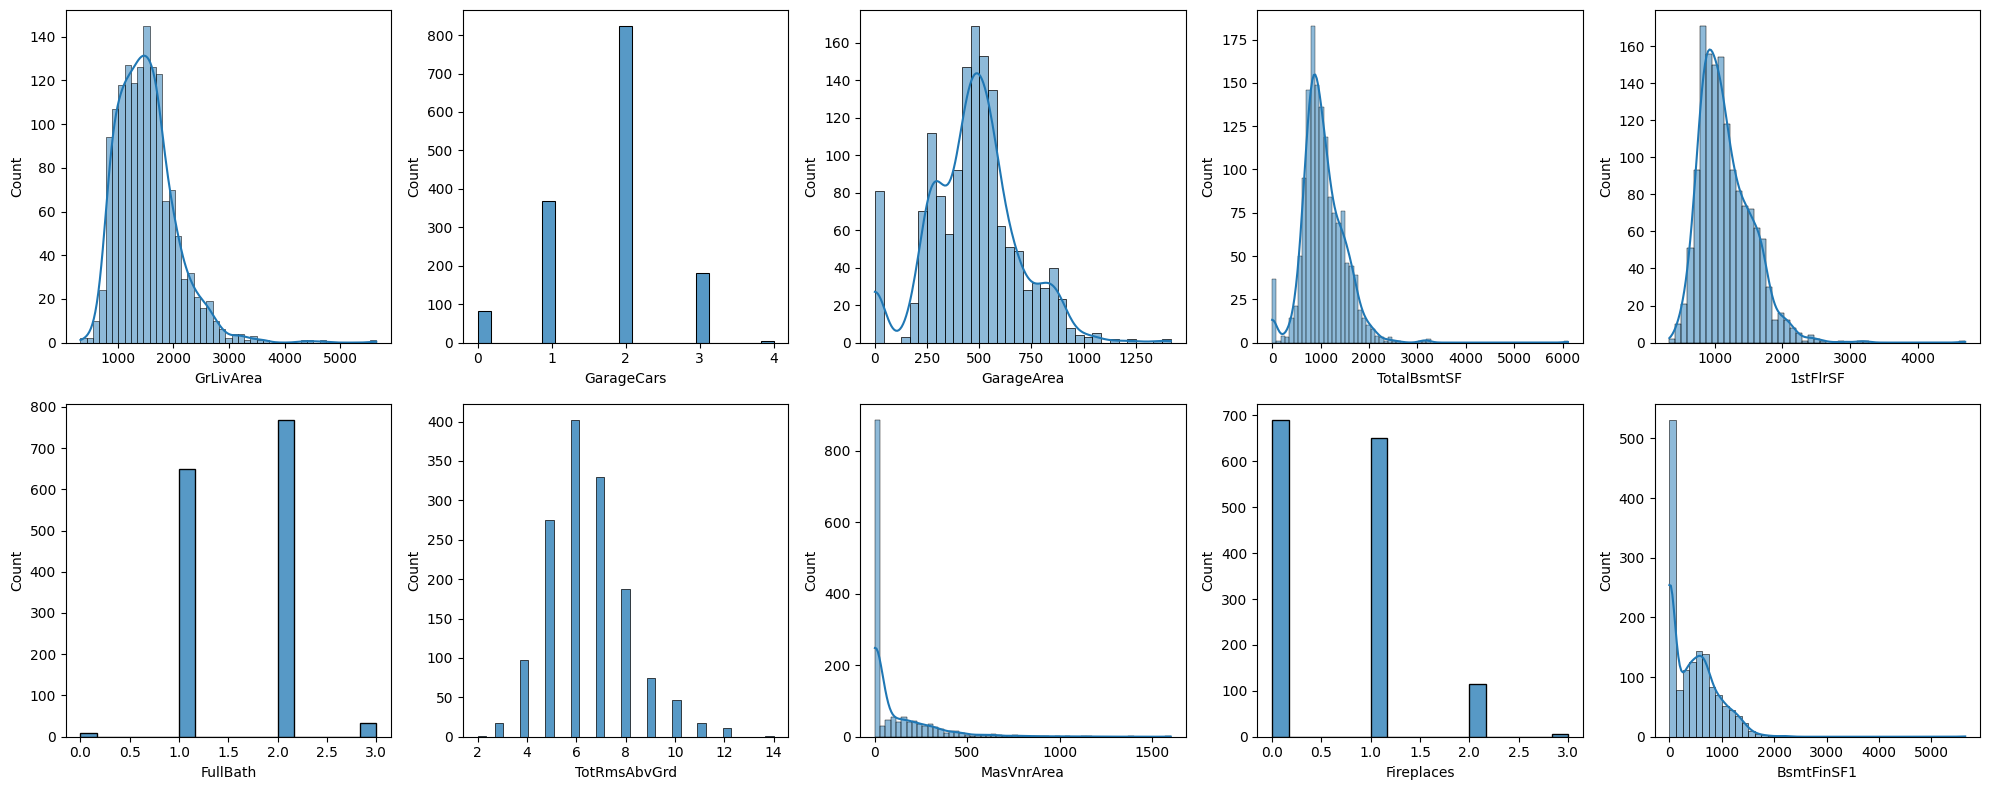

In [65]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

col = fselection_df['Score'].sort_values(ascending=False).index.tolist()

sns.histplot(data = df_numerical, x = col[0], kde=True, ax=axs[0, 0])
sns.histplot(data = df_numerical, x = col[1], kde=False, ax=axs[0, 1])
sns.histplot(data = df_numerical, x = col[2], kde=True, ax=axs[0, 2])
sns.histplot(data = df_numerical, x = col[3], kde=True, ax=axs[0, 3])
sns.histplot(data = df_numerical, x = col[4], kde=True, ax=axs[0, 4])
sns.histplot(data = df_numerical, x = col[5], kde=False, ax=axs[1, 0])
sns.histplot(data = df_numerical, x = col[6], kde=False, ax=axs[1, 1])
sns.histplot(data = df_numerical, x = col[7], kde=True, ax=axs[1, 2])
sns.histplot(data = df_numerical, x = col[8], kde=False, ax=axs[1, 3])
sns.histplot(data = df_numerical, x = col[9], kde=True, ax=axs[1, 4])


plt.tight_layout()
plt.show()

2.3 Categorical features

In [20]:
na_counts = df_categorical.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
Electrical         1
dtype: int64

For the categorical features, the NaN values represent the 'none' modality !! so we will not consider them as NaN values. 
Instead, we will simply change the type of the columns to string.

In [21]:
na_counts = na_counts[na_counts > 0]
for col in na_counts.index.tolist():
    df_categorical.loc[:, col] = df_categorical[col].astype(str)

In [22]:
df_categorical.isna().sum().sum()

0

In [23]:
df_categorical['PoolQC'].dtypes == "object"

True

Encode qualitative variables of type object.

In [24]:
# Encode qualitative variables of type object.
from sklearn.preprocessing import LabelEncoder

df_categorical_enc = df_categorical.copy()

for col in df_categorical_enc.columns:
    encoder = LabelEncoder()
    if df_categorical_enc[col].dtypes == "object":
        df_categorical_enc[col] = encoder.fit_transform(df_categorical_enc[col])

df_categorical_enc

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,3,1,2,3,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
1,20,3,1,2,3,3,0,2,0,24,...,1,1,4,4,2,3,4,4,8,4
2,60,3,1,2,0,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
3,70,3,1,2,0,3,0,0,0,6,...,5,2,4,4,2,3,4,4,8,0
4,60,3,1,2,0,3,0,2,0,15,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,1,2,3,3,0,4,0,8,...,1,1,4,4,2,3,4,4,8,4
1456,20,3,1,2,3,3,0,4,0,14,...,1,2,4,4,2,3,2,4,8,4
1457,70,3,1,2,3,3,0,4,0,6,...,1,1,4,4,2,3,0,2,8,4
1458,20,3,1,2,3,3,0,4,0,12,...,1,2,4,4,2,3,4,4,8,4


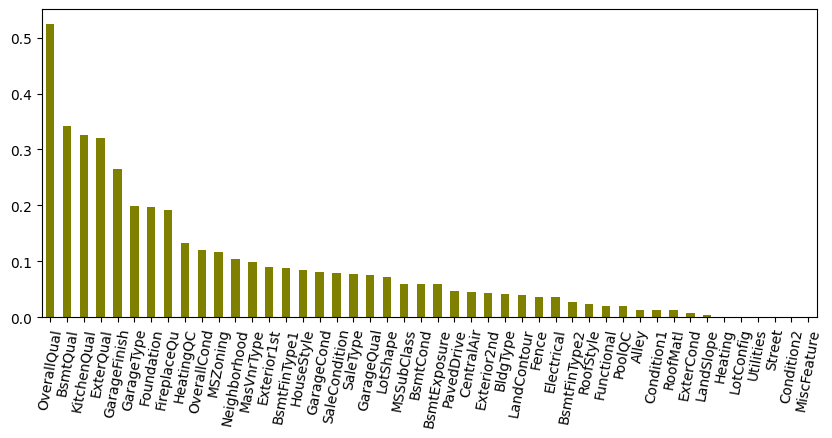

In [25]:
# Feature selection
from sklearn.feature_selection import mutual_info_regression, f_classif
from sklearn.feature_selection import SelectKBest

fselection = SelectKBest(score_func = mutual_info_regression, k="all")
fselection.fit_transform(df_categorical_enc, df["SalePrice"])

fselection_df = pd.DataFrame(fselection.scores_, index = df_categorical_enc.columns, columns= ['Score'])
fselection_df['Score'].sort_values(ascending=False).plot.bar(figsize=(10,4), color = 'olive')
plt.xticks(rotation=80)
plt.show()


We will create a violin plot for the 10 features most correlated with the target variable.

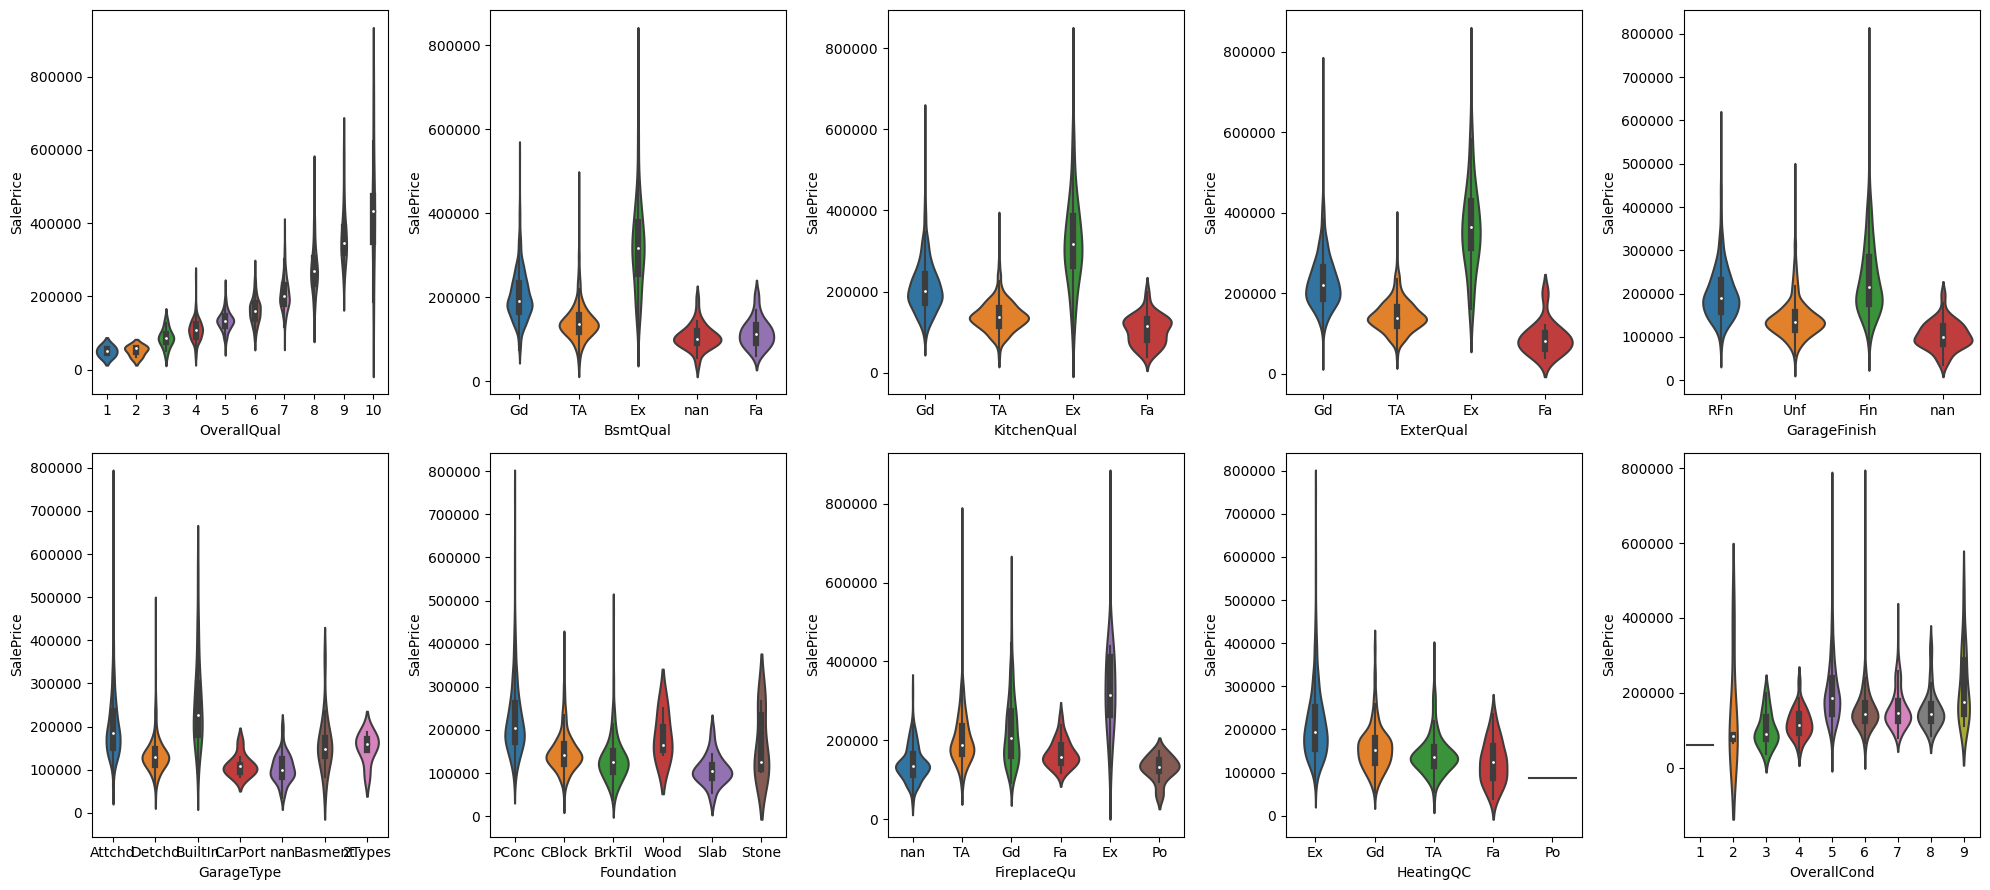

In [63]:
import warnings
warnings.filterwarnings("ignore", message=".*is_categorical_dtype is deprecated.*", category=FutureWarning)

fig, axs = plt.subplots(2, 5, figsize=(20, 9))

col = fselection_df['Score'].sort_values(ascending=False).index.tolist()

sns.violinplot(x=df_categorical[col[0]], y=df["SalePrice"], ax=axs[0, 0])
sns.violinplot(x=df_categorical[col[1]], y=df["SalePrice"], ax=axs[0, 1])
sns.violinplot(x=df_categorical[col[2]], y=df["SalePrice"], ax=axs[0, 2])
sns.violinplot(x=df_categorical[col[3]], y=df["SalePrice"], ax=axs[0, 3])
sns.violinplot(x=df_categorical[col[4]], y=df["SalePrice"], ax=axs[0, 4])
sns.violinplot(x=df_categorical[col[5]], y=df["SalePrice"], ax=axs[1, 0])
sns.violinplot(x=df_categorical[col[6]], y=df["SalePrice"], ax=axs[1, 1])
sns.violinplot(x=df_categorical[col[7]], y=df["SalePrice"], ax=axs[1, 2])
sns.violinplot(x=df_categorical[col[8]], y=df["SalePrice"], ax=axs[1, 3])
sns.violinplot(x=df_categorical[col[9]], y=df["SalePrice"], ax=axs[1, 4])

plt.tight_layout()
plt.show()

2.4 The features in the dataset represent dates

In [28]:
date_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [126]:
df_date = df[date_features]
df_date.loc[df_date['GarageYrBlt'].isna(), "GarageYrBlt"] = 0


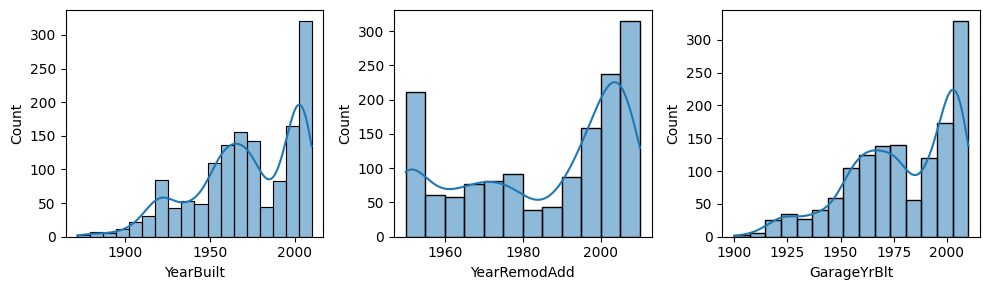

In [49]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

fig, axs = plt.subplots(1,3, figsize=(10, 3))

sns.histplot(data = df, x = date_features[0], kde=True, ax=axs[0])
sns.histplot(data = df, x = date_features[1], kde=True, ax=axs[1])
sns.histplot(data = df, x = date_features[2], kde=True, ax=axs[2])

plt.tight_layout()
plt.show()


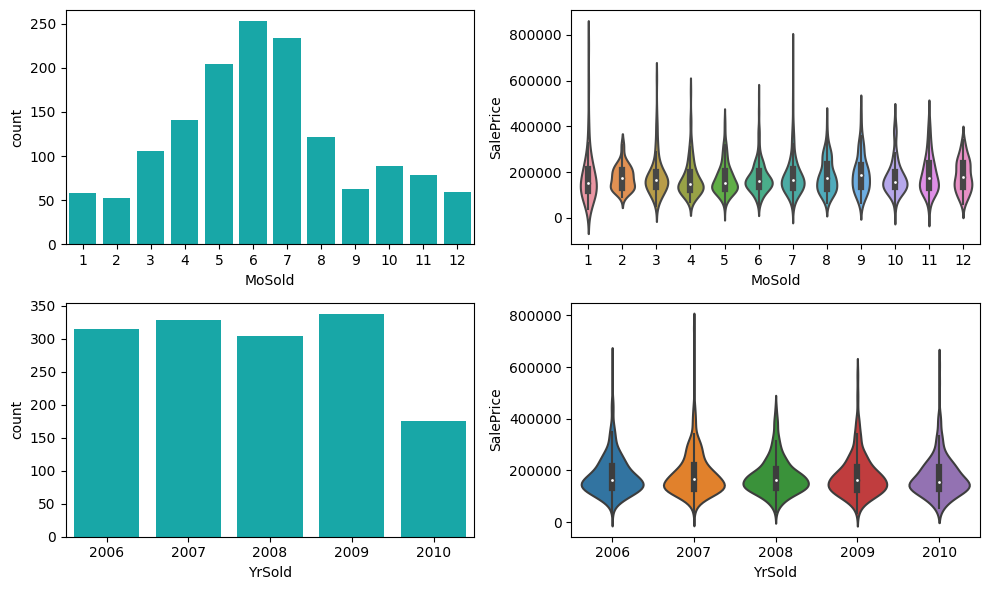

In [62]:
fig, axs = plt.subplots(2,2, figsize=(10, 6))
sns.countplot(data = df, x = date_features[3], ax=axs[0,0], color="c")
sns.violinplot(x = df[date_features[3]], y=df["SalePrice"], ax=axs[0, 1])

sns.countplot(data = df, x = date_features[4], ax=axs[1,0], color="c")
sns.violinplot(x = df[date_features[4]], y=df["SalePrice"], ax=axs[1, 1])

plt.tight_layout()
plt.show()


We notice that most houses are sold between April and August.

Regarding an overview of house prices, we observe that for both the month and year of sale, the density of prices is fairly consistent across all categories. We will delve deeper into this in a dedicated analysis notebook.

3. Build Models

- Multiple Regression
- Random Forest
- Gradient Boosting
- XgBoost

1- Multiple Regression

Split & Normalize data

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_numerical_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_features)
df_numerical_normalized

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,...,0.600495,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1456,0.687385,0.266407,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,...,2.152216,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1457,-0.175462,-0.147810,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,...,2.152216,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112
1458,-0.084636,-0.080160,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,...,-0.951226,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688


In [127]:
df_train = pd.concat([df_numerical_normalized, df_categorical_enc, df_date, df[['SalePrice']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1], df_train[["SalePrice"]], random_state=44)

In [129]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
print("Intercept: ", lr.intercept_)
print("Coefficients:")
list(zip(X_train, lr.coef_))

Intercept:  [1331426.67816447]
Coefficients:


[('LotFrontage',
  array([-4.89767465e+03,  2.23196178e+03,  1.02134217e+04,  4.27763786e+02,
          8.83899985e+02, -1.80485653e+03, -1.04811609e+03,  1.02551347e+04,
          6.34380098e+03, -1.19666244e+03,  1.27037538e+04,  3.50996029e+03,
         -6.42787067e+02,  9.33836064e+02, -2.77307910e+02, -1.63174868e+03,
         -2.89575404e+03,  6.70174003e+03,  3.19744984e+03,  1.36557512e+04,
         -2.80460210e+03,  1.88173241e+03, -5.94238702e+02, -8.67343842e+02,
          1.87235731e+03,  2.05402259e+03, -1.09240423e+04,  5.66612425e+02,
         -1.14871553e+02, -2.30717728e+03,  9.39236204e+03,  5.84979663e+03,
         -8.28796145e+02,  4.77287969e+03, -6.52451822e+04, -1.91233459e+02,
          7.15859486e+03,  4.35162775e+02, -1.31461441e+03, -1.81212298e+04,
         -2.90651762e+03, -1.38607923e+03,  1.10912150e+04,  6.38506579e+03,
          1.89352863e+03,  6.79568366e+03, -9.40627251e+02,  5.48924851e+02,
          6.76460810e+03, -9.68027922e+03,  1.79267526e+03,

In [160]:
#Prediction of test set
y_pred_lr= lr.predict(X_test)
y_pred_df = pd.DataFrame(y_pred_lr, columns=['SalePrice_predicted'])

In [165]:
#Actual value and the predicted value
lr_diff = pd.DataFrame({'Actual value': y_test.SalePrice.values, 'Predicted value': y_pred_df.SalePrice_predicted.values})
lr_diff

,Actual value,Predicted value
0,139000,130504.953878
1,150750,158572.770504
2,345000,325181.514480
3,133900,111659.240005
4,140000,132993.425191
...,...,...
360,185850,224588.281197
361,171900,163697.106868
362,127000,116447.844226
363,99900,123540.432810


In [166]:
#Model Evaluation
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(lr_diff['Actual value'], lr_diff['Predicted value'])
meanSqErr = metrics.mean_squared_error(lr_diff['Actual value'], lr_diff['Predicted value'])
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(lr_diff['Actual value'], lr_diff['Predicted value']))
print('R squared: {:.2f}'.format(lr.score(X_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 85.16
Mean Absolute Error: 20848.00491159374
Mean Square Error: 859888938.3340532
Root Mean Square Error: 29323.862950403603
